### Objetivo: Verificar funcionamiento de módulo GDAL instalado

Ref: [Instalador GDAL](https://mothergeo-py.readthedocs.io/en/latest/development/how-to/gdal-ubuntu-pkg.html)

In [4]:
# standard imports
import sys

# import OGR
from osgeo import ogr

# Define path
gdb_path = r'/home/negrete/repos/NDVI_S2_gauge/Vectores/Campos_test.shp'

# use OGR specific exceptions
ogr.UseExceptions()

# get the driver
driver = ogr.GetDriverByName("ESRI Shapefile")

# opening the FileGDB
try:
    gdb = driver.Open(gdb_path, 0)
except Exception as e:
    print(e)
    sys.exit()

# list to store layers'names
featsClassList = []

# parsing layers by index
for featsClass_idx in range(gdb.GetLayerCount()):
    featsClass = gdb.GetLayerByIndex(featsClass_idx)
    featsClassList.append(featsClass.GetName())

# sorting
featsClassList.sort()

# printing
for featsClass in featsClassList:
    print(featsClass)

# clean close
del gdb

Campos_test


Funciona correctamente

### Verificación de instalaciones de rasterio y fiona

In [9]:
import rasterio, fiona, numpy
print('Versión de raterio', rasterio.__version__,sep='\n')
print('Versión de fiona', fiona.__version__,sep='\n')
print('Versión de numpy', numpy.__version__,sep='\n')

Versión de raterio
1.3.8
Versión de fiona
1.9.4.post1
Versión de numpy
1.25.1


In [13]:
# Nuevas verificaciones de instalación
import geopandas as gpd, geoplot, matplotlib
%matplotlib inline
print('Versión de geopandas', gpd.__version__,sep='\n')
print('Versión de geoplot', geoplot.__version__,sep='\n')
print('Versión de matplotlib', matplotlib.__version__,sep='\n')

Versión de geopandas
0.13.2
Versión de geoplot
0.5.1
Versión de matplotlib
3.7.2


In [14]:
example_shp = gpd.read_file(gdb_path)
example_shp.head()

,id,geometry
0,1,"POLYGON ((-61.13111 -38.87918, -61.12089 -38.8..."
1,2,"POLYGON ((-61.12079 -38.87134, -61.13105 -38.8..."
2,3,"POLYGON ((-61.12057 -38.87138, -61.11033 -38.8..."
3,4,"POLYGON ((-61.11669 -38.85995, -61.11076 -38.8..."


<Axes: >

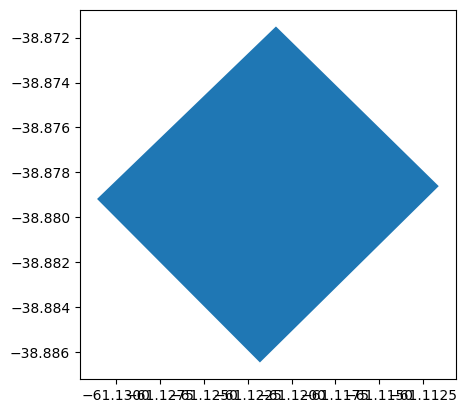

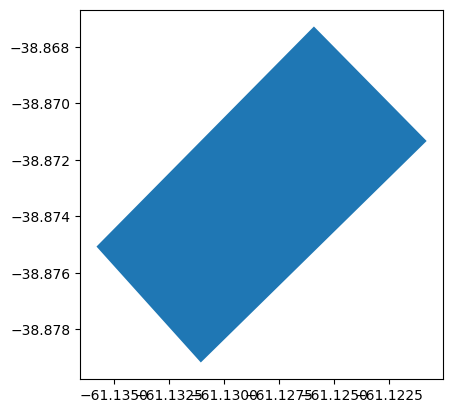

In [19]:
# Ejemplo visualización de información geográfica
example_shp[example_shp['id']==1].plot()
example_shp[example_shp['id']==2].plot()

In [21]:
example_shp.crs
example_shp["area"] = example_shp.area
example_shp["area"]

/tmp/ipykernel_3435/2562213262.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  example_shp["area"] = example_shp.area


0    0.000146
1    0.000080
2    0.000155
3    0.000079
Name: area, dtype: float64

<Axes: >

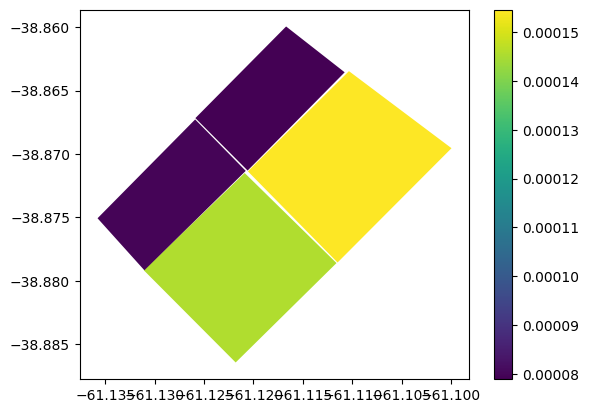

In [22]:
example_shp.plot("area", legend=True)

In [25]:
import folium, mapclassify
print('Versión de folium', folium.__version__,sep='\n')
print('Versión de mapclassify', mapclassify.__version__,sep='\n')

Versión de folium
0.14.0
Versión de mapclassify
2.6.0


In [26]:
# example_shp.explore("area", legend=False)
example_shp.explore("area", legend=False)